# BCB 546X: Python Translate Script Assignment
## FUNCTIONS SECTION

#### Modules to import

In [195]:
# General modules
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

# Function modules:
    # Function 2
from textwrap import wrap
    # Function 3
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
    # Function 4
from Bio.SeqUtils.ProtParam import ProteinAnalysis
    # Function 5
from Bio.SeqUtils import GC

### Function 1
##### D. X's function for getting sequences from a fasta file

In [196]:
###################################################################################################
### Function to output the sequences of a fasta file as a python dictionary ###                 ###
###################################################################################################
def get_sequences_from_file(fasta_fn):                       # This line defines the function name and gives
                                                             #     the input file a name as a variable
    sequence_data_dict = {}                                  # This line creates an empty dictionary called
                                                             #     sequence_data_dict
    for record in SeqIO.parse(fasta_fn, "fasta"):            # This line takes the input file and tells the
                                                             #     SeqIO module to parse it as a fasta file.
                                                             #     It then iterates over every record in the
                                                             #     output of the SeqIO parse function, and
                                                             #     assigns that record to the variable name
                                                             #     "record".
        description = record.description.split()             # This line takes the description field of each
                                                             #     record that was passed to it from the for
                                                             #     loop, and splits it into a list of strings,
                                                             #     with each instance of whitespace in the
                                                             #     record serving as a delimiter to separate
                                                             #     one string from another. This list of
                                                             #     strings is assigned to the variable 
                                                             #     "description".
        species_name = description[1] + " " + description[2] # This line takes the first two "words", the
                                                             #     first two strings, from the "description"
                                                             #     variable, and assigns that to the "species
                                                             #     name" variable.
        sequence_data_dict[species_name] = record.seq        # This line sets the sequence for each record as
                                                             #     the value returned by sequence_data_dict
                                                             #     whenever the species name that was found
                                                             #     in the description is used as a search key.
    return(sequence_data_dict)                               # This line returns sequence_data_dict as the 
                                                             #     output of this function.
########################################## SUMMARY ################################################
# This function takes in a fasta file and outputs a dictionary file by parsing the file using the #
# SeqIO module and then iterating over the resulting records, getting the first two words of      #
# SeqIO's description field, taking those two words as the species name to be used as a key for   #
# the dictionary, and assigning the sequence to be returned when the species name is used as key. #
###################################################################################################

### Function 2
##### Nucleotide translate function as per DR. X's pseudocode

In [197]:
###################################################################################################
### Function to output the amino acid sequence for a given nucleotide sequence ###              ###
###################################################################################################
def get_aminos_from_nucleos(nucleostring):                                       # This line defines the function name and gives
                                                                                 #     the input file a name as a variable.
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  # This line loads the vertebrate mitochondrial
                                                                                 #     codon table into a dictionary named
                                                                                 #     mito_table.
    aminolist = []                                                               # This line initializes a list of amino acids.
    for codon in wrap(nucleostring, 3):                                          # This line breaks the input file into three-
                                                                                 #     character chunks, and passes them as a
                                                                                 #     variable named "codon".
        if codon == "AGA" or codon == "AGG" or codon == "TAA" or codon == "TAG": # This line checks if the codon is a stop codon.
            continue                                                             # This line tells the for-loop to move to the next
                                                                                 #     codon if the previous stop codon check
                                                                                 #     passes.
        else:                                                                    # This line tells the for-loop that the next
                                                                                 #     instructions will be what to do if the
                                                                                 #     previous check doesn't pass.
            aminolist.append(str(mito_table.forward_table[str(codon)]))          # This line does all the heavy lifting. It looks up
                                                                                 #     the corresponding amino acid in mito_table's
                                                                                 #     forward_table field by passint the codon
                                                                                 #     string as a variable, then appends the output
                                                                                 #     to the previously-initiated aminolist string.
            continue                                                             # This line tells the for-loop to move to the next
                                                                                 #     codon.
    aminostring = ''.join(aminolist)                                             # This line converst the aminolist into a single
                                                                                 #     string.
    return(aminostring)                                                          # This line returns the completed aminostring.
########################################## SUMMARY ################################################
# This function takes in a string of nucleotides and outputs what amino acid sequence that string #
# would be translated into by the vertebrate mitochondria, using a for loop and Biopython codon   #
# table.                                                                                          #
###################################################################################################

### Function 3
##### Nucleotide translate function, new and improved

In [198]:
###################################################################################################
### Function to output the amino acid sequence for a given nucleotide sequence ###              ###
###################################################################################################
def translate_function(nucleostring):                            # This line defines the function name and gives
                                                                 #     the input file a name as a variable.
    seq = Seq(str(nucleostring), IUPAC.unambiguous_dna)          # This line stores the nucleostring as a dna sequence
                                                                 #     named "seq" using the Seq module.
    return(str(seq.translate(table=2, to_stop=True)))            # This line converts seq into an amino acid string with no
                                                                 #     stop codon using the built-in translate function.
                                                                 #     Table=2 is what specifies use of the vertebrate
                                                                 #     mitochondrial codon table.
########################################## SUMMARY ################################################
# This function takes in a string of nucleotides and outputs what amino acid sequence that string #
# would be translated into by the vertebrate mitochondria, using the built-in translate function. #
###################################################################################################

### Function 4
##### Molecular weight of each amino acid sequence calculator

In [199]:
###################################################################################################
### Function to output the molecular weight of each 3 amino acid sequence ###                   ###
###################################################################################################
def compute_molecular_weight(aminoseq):         # This line defines the function names and gives the
                                                #     input file a name as a variable.
    seq = str(aminoseq)                         # This line converts the input file to a string named "seq".
    if not "*" in seq:                          # This line checks that there are no stop codons in the string.
        analyzed_seq = ProteinAnalysis(seq)    # This line uses ProteinAnalysis on seq.
        return(analyzed_seq.molecular_weight()) # This line returns the molecular_weight field from the analyzed seq.
    else:                                       # This line tells the for-loop that the next instructions will be 
                                                #     what to do if the previous check doesn't pass.
        return(0)                               # This line returns a zero if there are any stop codons in the string.
########################################## SUMMARY ################################################
# This function takes in a string of amino acids and outputs the molecular weight of that protein #
# using a function in the module ProtParam.                                                       #
###################################################################################################

### Function 5
##### Function to compute GC-content of each DNA sequence

In [200]:
###################################################################################################
### Function to compute GC-content of each DNA sequence ###                                     ###
###################################################################################################
def compute_gc_content(nucleoseq): # This line defines the function names and gives the input file a name as a variable.
    return(GC(nucleoseq))          # This line returns the GC content of the input file using a function from the module SeqUtils.
########################################## SUMMARY ################################################
# This function takes in a string of nucleotides and outputs the percent GC content of the        #
# sequence using a function in the module SeqUtils.                                               #
###################################################################################################

## MAIN SECTION
##### Initial code given by Dr. X:

In [201]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # This line uses our first function to create a dictionary of cytb_seqs
                                                           #     for various penguin species out of our provided fasta.

penguins_df = pd.read_csv("penguins_mass.csv")             # This line puts our penguin mass table into a python dataframe. 
species_list = list(penguins_df.species)                   # This line puts our list of species into a python list.

### Step 6
##### Add two new columns to penguin DataFrame:

In [202]:
emptycolumn = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
                                              # The above line creates a list with as many "NaN" entries as we 
                                              #     happen to have columns; this will be our empty column template.
penguins_df['molecular weight'] = emptycolumn # This line creates an empty column named "molecular weight".
penguins_df['GC_content'] = emptycolumn       # This line creates an empty column named "GC content".
print(penguins_df)                            # This line shows us our new DataFrame:

                    species   mass molecular weight GC_content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


### Step 7
##### Write a for-loop that adds the molecular weight and GC content data to the DataFrame:

In [203]:
for i in range(0, len(penguins_df['species'])):    # This line sets the loop to iterate numerically over as many species as we have.
    name = penguins_df['species'][i]               # This line gets the name of the i-th species.
    nucleoseq = cytb_seqs[name]                    # This line gets the nucleotide sequence of the i-th species.
    aminoseq = translate_function(nucleoseq)       # This line gets the translated amino acid sequence of the i-th species.
    molweight = compute_molecular_weight(aminoseq) # This line gets the molecular weight of the translated amino acid.
    gccontent = compute_gc_content(nucleoseq)      # This line gets the GC content of the nucleotide sequence.
    penguins_df['molecular weight'][i] = molweight # This line records the molecular weight in the i-th place of the correct column.
    penguins_df['GC_content'][i] = gccontent       # This line records the GC content in the i-th place of the correct column.
print(penguins_df)                                 # This line prints us our results.

                    species   mass molecular weight GC_content
0      Aptenodytes forsteri  28.00          42459.6    48.3815
1   Aptenodytes patagonicus  13.40          42563.7    49.6938
2       Eudyptes chrysocome   2.80          42475.6    51.1811
3     Eudyptes chrysolophus   4.50          42445.5    50.9186
4         Eudyptes sclateri   4.25          42475.6    50.8311
5           Eudyptula minor   1.60          42491.6    49.2563
6        Pygoscelis adeliae   4.60          42458.6    49.0814
7     Pygoscelis antarctica   4.10          42404.5     47.769
8          Pygoscelis papua   6.10          42595.9    47.1566
9       Spheniscus demersus   3.20          42431.5     48.294
10     Spheniscus humboldti   4.75          42399.6    49.2563
11  Spheniscus magellanicus   3.40          42459.6    48.2065


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Step 8
##### Plot a bar-chart of the masses with the x-axes labeled with species names.

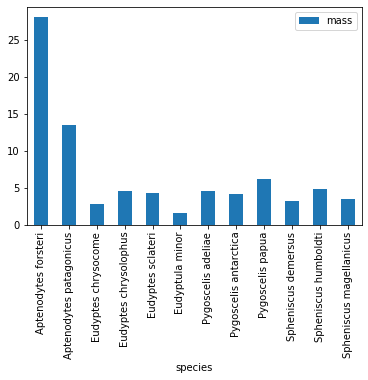

In [204]:
penguins_barplot = penguins_df.plot.bar(x='species', y='mass')

# The command above plots our dataframe as a bar graph with the species as the X-axis 
#     and the mass as the Y-axis.

### *Q1* What is the smallest penguin species?
#### Eudyptula minor
### *Q2* What else is interesting about this species?
#### It's got "minor" in its name, and the common name is "little penguin".
#### It is also known by its Māori name: kororā.

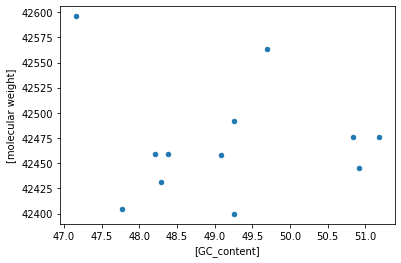

In [205]:
penguins_scatterplot = penguins_df.plot.scatter(x=['GC_content'], y=['molecular weight'])

# The command above plots our dataframe as a scatterplot with the GC content as the X-axis and the
#     molecular weight as the Y-axis.

In [206]:
penguins_df.to_csv(path_or_buf="penguins_mass_cytb.csv", index=False) 

# This line saves our modified dataframe to a csv file with the specified name, without including the index numbers 0-11.